In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import scipy.stats as stats

In [2]:
%config InlineBackend.figure_format = 'retina'
az.style.use('arviz-darkgrid')

#### Code 3.1

$$Pr(vampire|positive) = \frac{Pr(positive|vampire) Pr(vampire)} {Pr(positive)}$$

$$Pr(positive) = Pr(positive|vampire) Pr(vampire) + Pr(positive|mortal) (1 − Pr(vampire))$$

In [3]:
PrPV = 0.95
PrPM = 0.01
PrV = 0.001
PrP = PrPV * PrV + PrPM * (1 - PrV)
PrVP = PrPV * PrV / PrP
PrVP

0.08683729433272395

#### Code 3.2 - 3.5

We are goint to use the same function we use on chapter 2 (code 2.3)

In [4]:
def posterior_grid_approx(grid_points=100, success=6, tosses=9):
    """
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(5, grid_points)  # uniform
    # prior = (p_grid >= 0.5).astype(int)  # truncated
    # prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

In [5]:
p_grid, posterior = posterior_grid_approx(grid_points=100, success=6, tosses=9)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

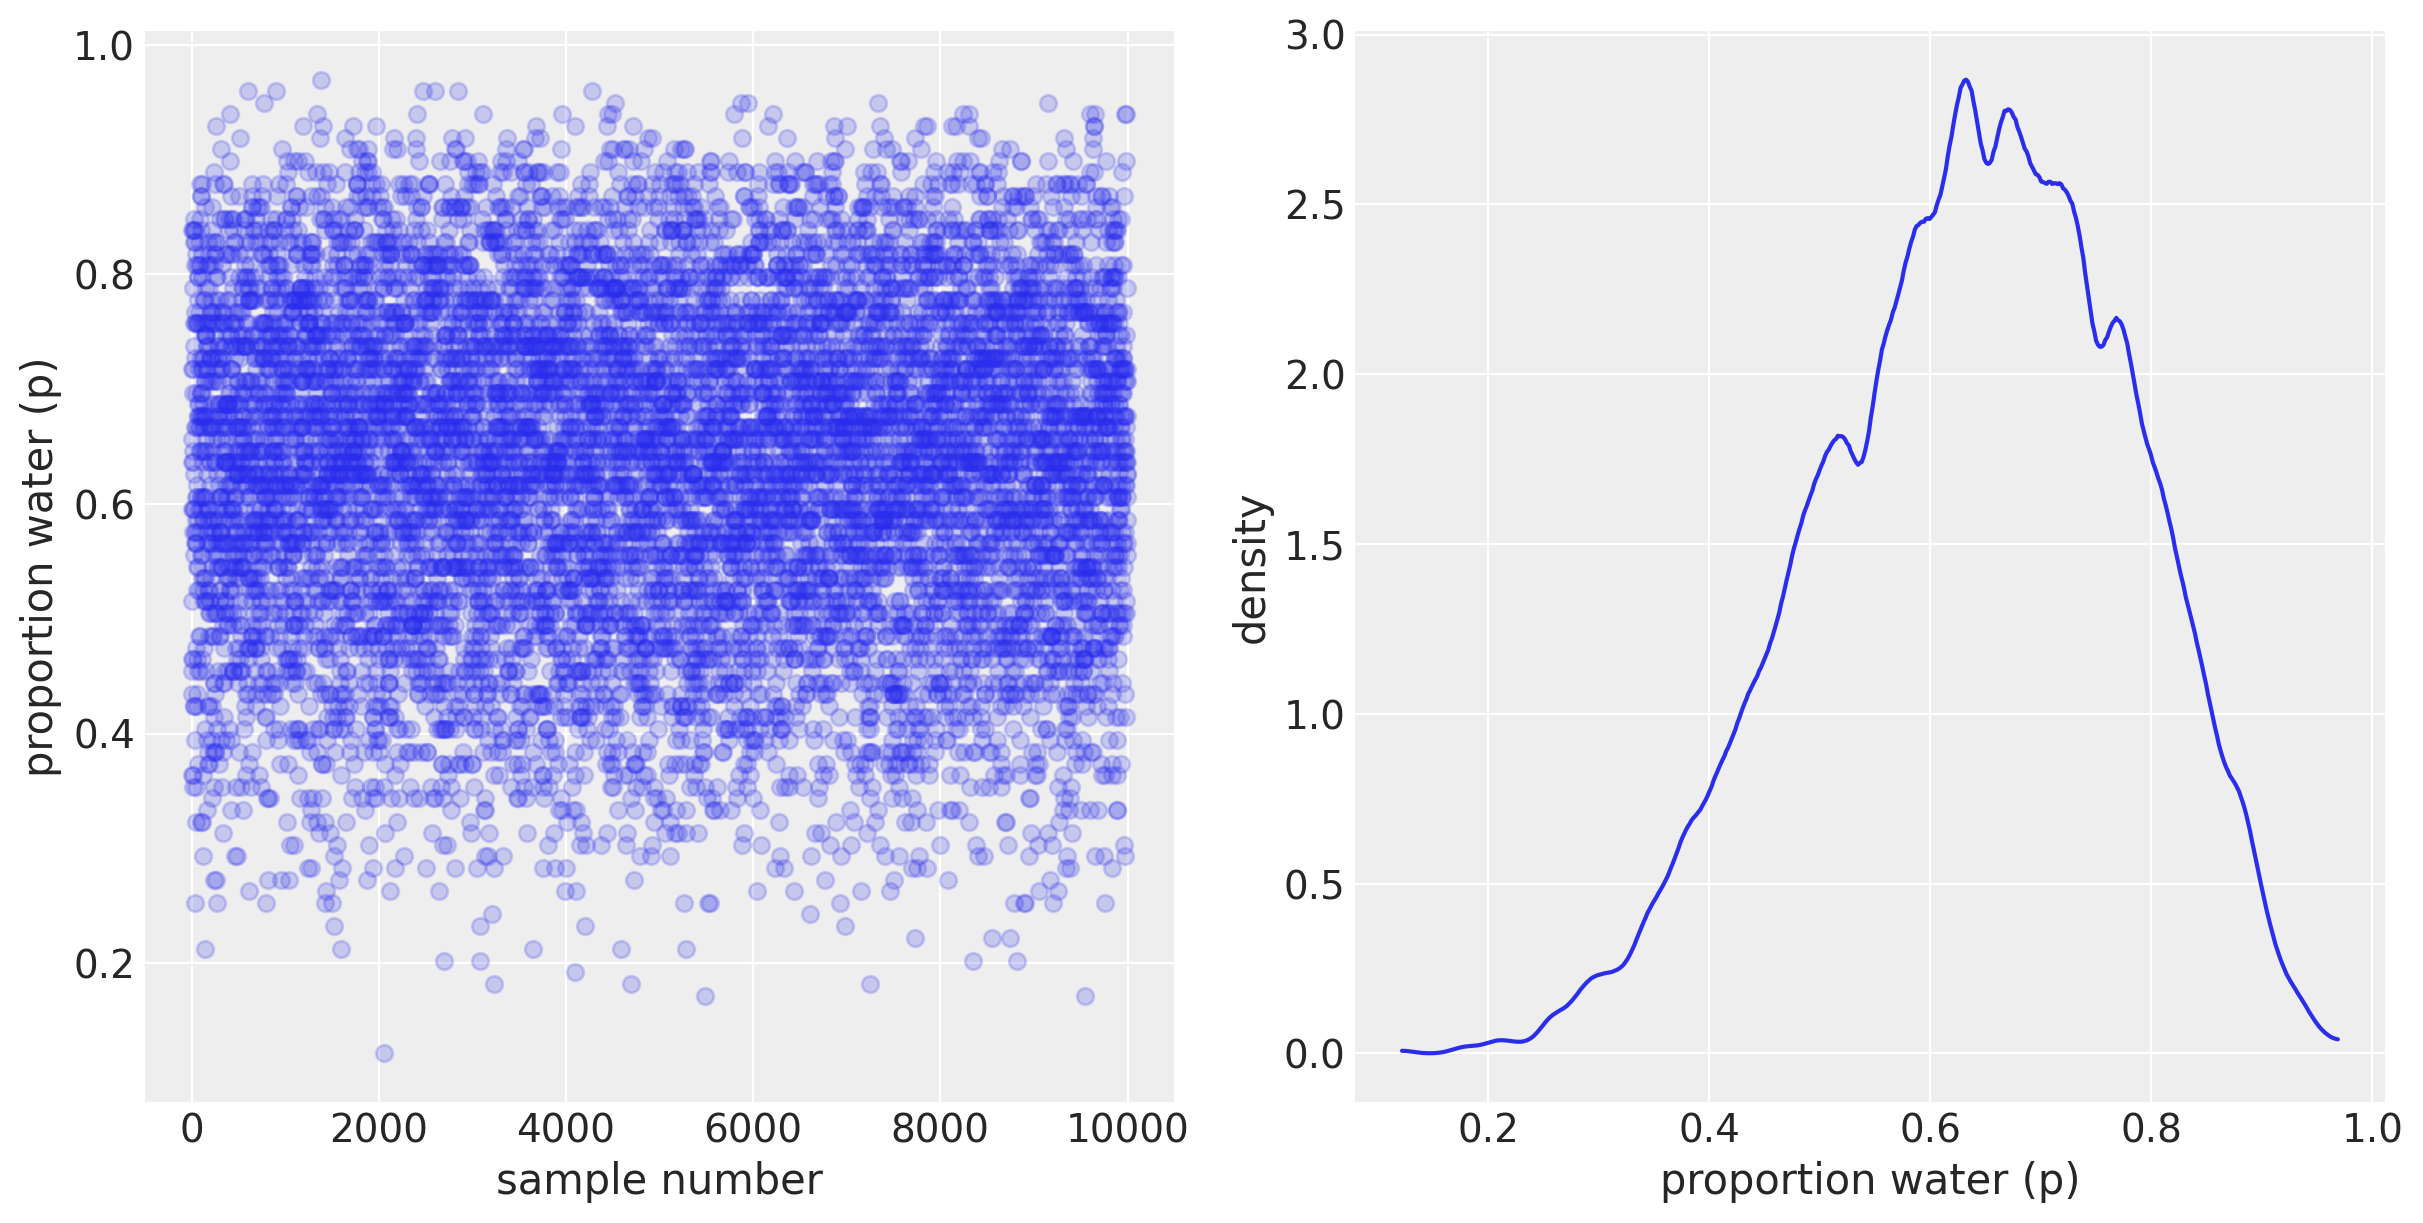

In [6]:
_, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))
ax0.plot(samples, "o", alpha=0.2)
ax0.set_xlabel("sample number")
ax0.set_ylabel("proportion water (p)")
az.plot_kde(samples, ax=ax1)
ax1.set_xlabel("proportion water (p)")
ax1.set_ylabel("density");

#### Code 3.6

In [7]:
sum(posterior[p_grid < 0.5])

0.17183313110747478

#### Code 3.7

In [8]:
sum(samples < 0.5) / 1e4

0.1788

#### Code 3.8

In [9]:
sum((samples > 0.5) & (samples < 0.75)) / 1e4

0.6013

#### Code 3.9

In [10]:
np.percentile(samples, 80)

0.7575757575757577

#### Code 3.10

In [11]:
np.percentile(samples, [10, 90])

array([0.44444444, 0.81818182])

#### Code 3.11

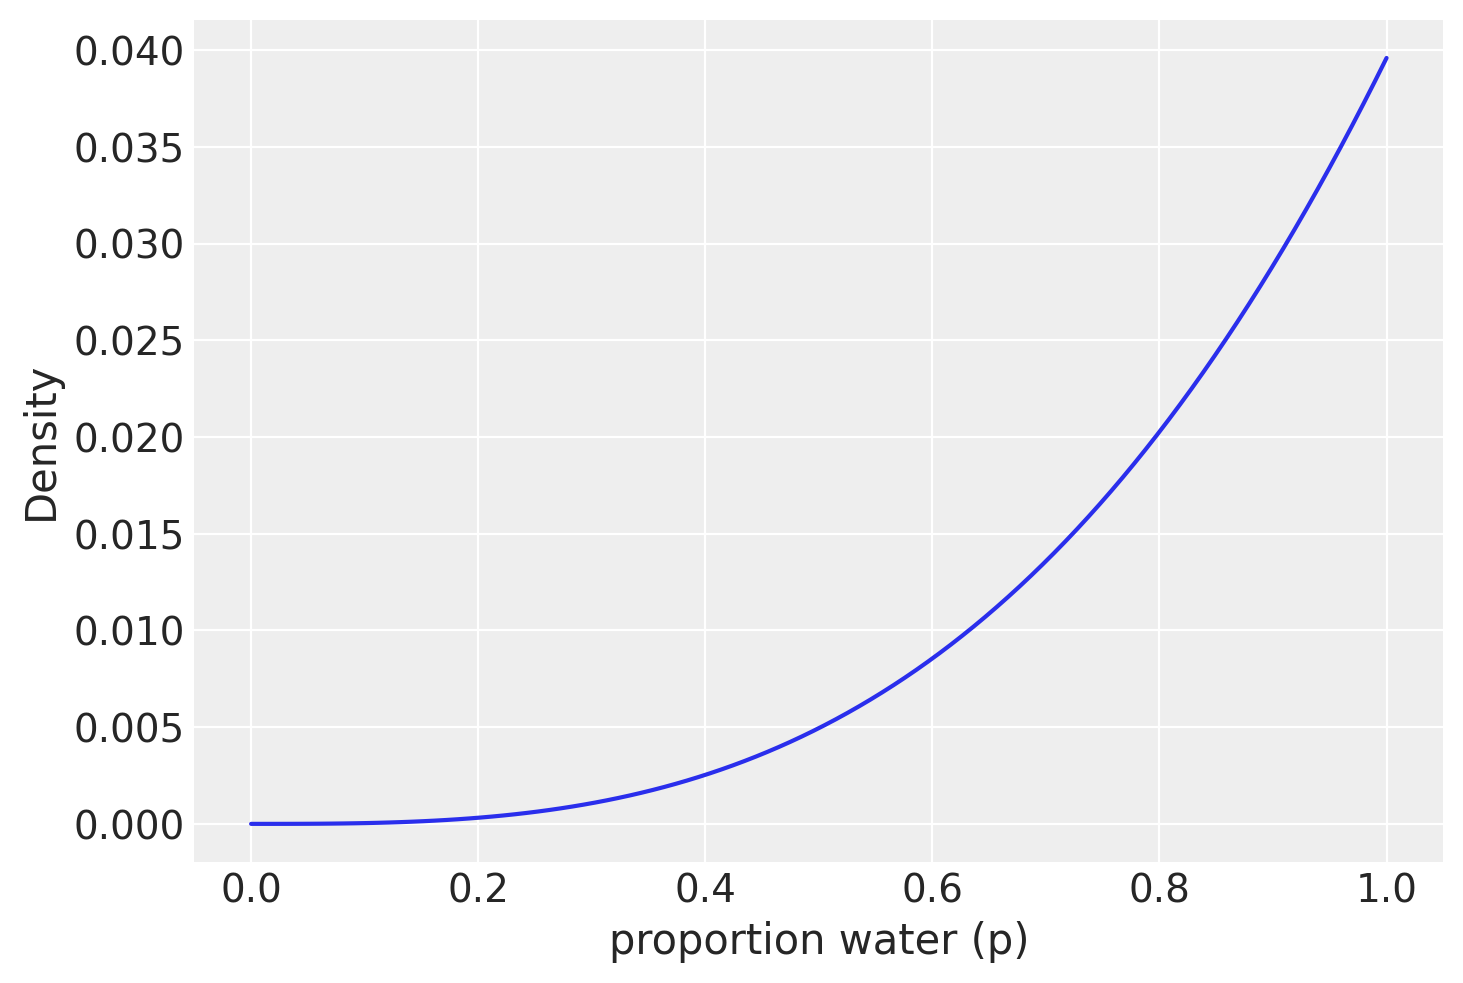

In [12]:
p_grid, posterior = posterior_grid_approx(success=3, tosses=3)
plt.plot(p_grid, posterior)
plt.xlabel("proportion water (p)")
plt.ylabel("Density");

#### Code 3.12

In [26]:
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
np.percentile(samples, [25, 75])

array([0.70707071, 0.93939394])

#### Code 3.13

Highest Posterior Density Interval (HPDI) - the densest interval for given probability mass

In [27]:
az.hdi(samples, hdi_prob=0.5)

array([0.84848485, 1.        ])

#### Code 3.14

In [28]:
p_grid[posterior == max(posterior)]

array([1.])

#### Code 3.15

In [29]:
stats.mode(samples)[0]

array([1.])

#### Code 3.16

In [30]:
np.mean(samples), np.median(samples)

(0.8052666666666667, 0.8484848484848485)

#### Code 3.17

In [31]:
sum(posterior * abs(0.5 - p_grid))

0.31626874808692995

#### Code 3.18 and 3.19

In [32]:
loss = [sum(posterior * abs(p - p_grid)) for p in p_grid]
p_grid[loss == min(loss)]

array([0.84848485])

### Sampling
1. Simulate from prior to see what the model produces before seeing the data
2. Model checking
3. Software validation
4. Research design - does the model describe the data well
    1. observation uncertainty
    2. parameter uncertainty - we would like to propagate it
5. Forecasting

Even though a specification of a model is wrong, it may converge to the correct answer. It will just take it longer.

#### Code 3.20

In [35]:
stats.binom.pmf(range(3), n=2, p=0.7)

array([0.09, 0.42, 0.49])

#### Code 3.21

In [52]:
stats.binom.rvs(n=2, p=0.7, size=1)

array([2])

#### Code 3.22

In [53]:
stats.binom.rvs(n=2, p=0.7, size=10)

array([2, 2, 2, 1, 2, 1, 1, 1, 0, 1])

#### Code 3.23

In [54]:
dummy_w = stats.binom.rvs(n=2, p=0.7, size=int(1e5))
[(dummy_w == i).mean() for i in range(3)]

[0.0906, 0.41818, 0.49122]

#### Code 3.24, 3.25 and 3.26

In [55]:
samples

array([0.82828283, 0.86868687, 0.71717172, ..., 0.90909091, 0.52525253,
       0.98989899])

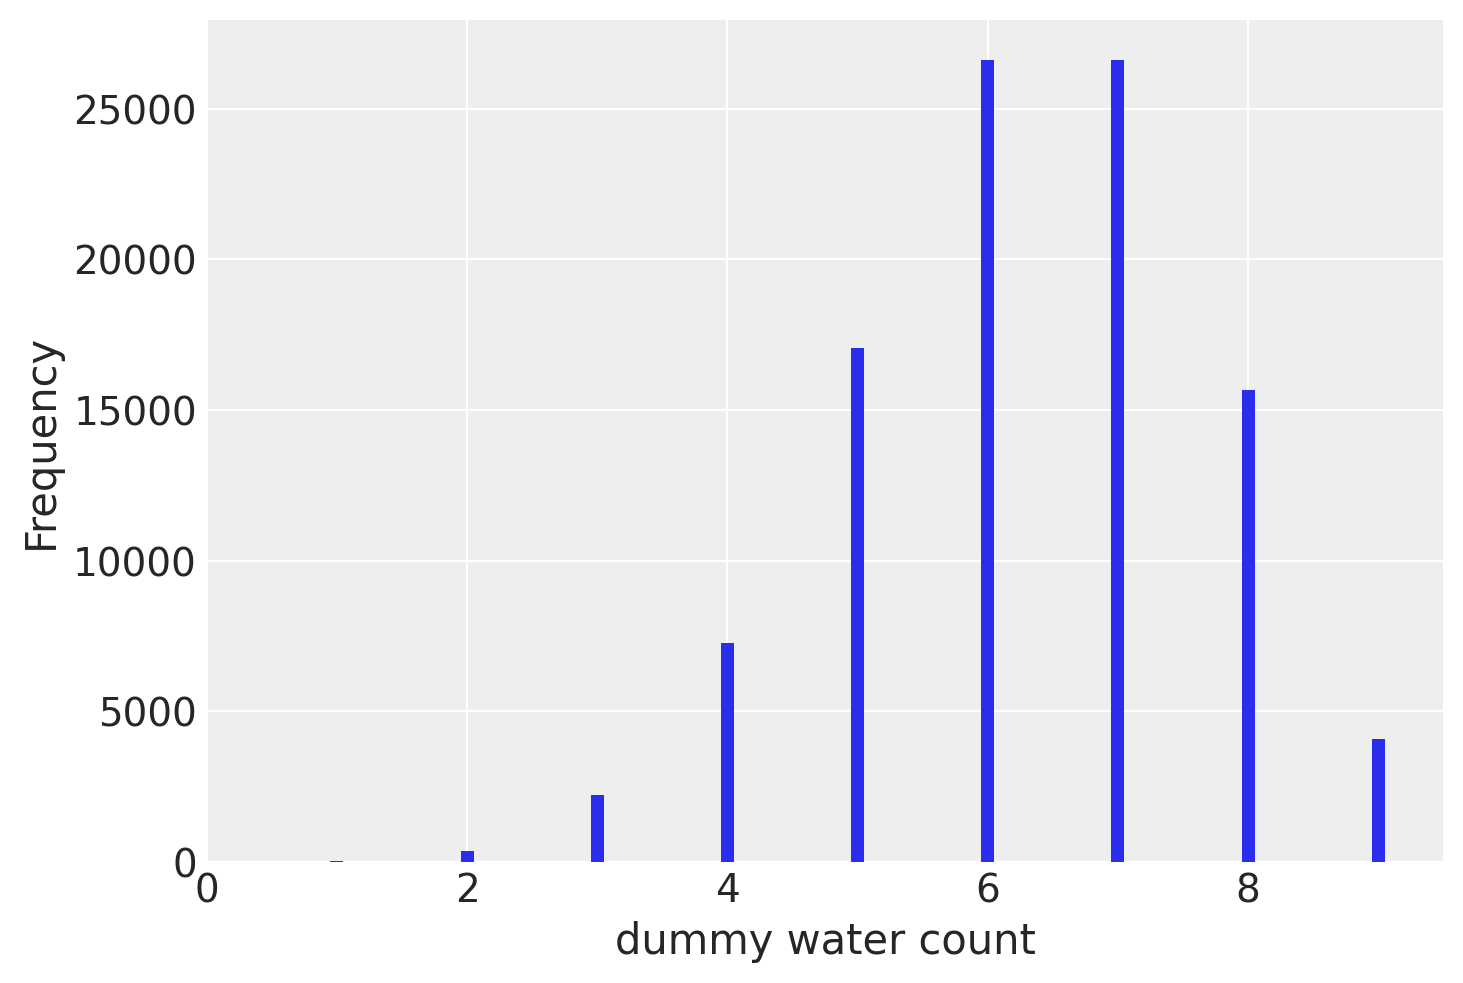

In [57]:
dummy_w = stats.binom.rvs(n=9, p=0.7, size=int(1e5))
# dummy_w = stats.binom.rvs(n=9, p=0.6, size=int(1e4))
# dummy_w = stats.binom.rvs(n=9, p=samples)
bar_width = 0.1
plt.hist(dummy_w, bins=np.arange(0, 11) - bar_width / 2, width=bar_width)
plt.xlim(0, 9.5)
plt.xlabel("dummy water count")
plt.ylabel("Frequency");

#### Code 3.27

In [58]:
p_grid, posterior = posterior_grid_approx(grid_points=100, success=6, tosses=9)
np.random.seed(100)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

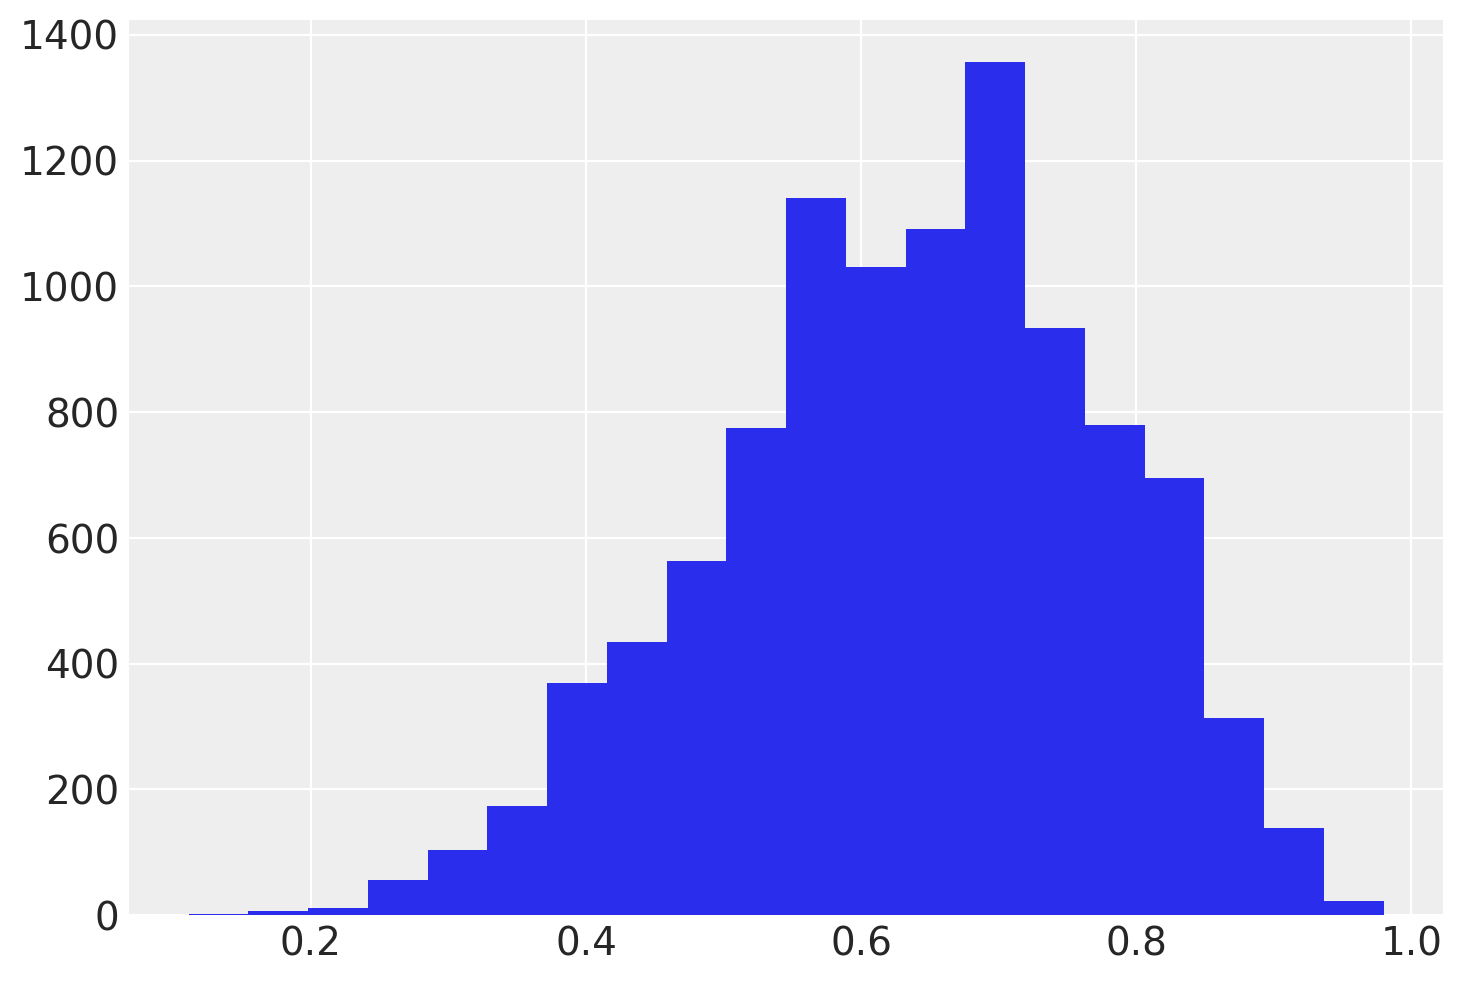

In [59]:
plt.hist(samples, bins=20);

#### 3E1

In [60]:
sum(samples < 0.2) / len(samples)

0.0009

#### 3E2

In [61]:
sum(samples > 0.8) / len(samples)

0.1169

#### 3E3

In [62]:
sum((samples >= 0.2) * (samples <= 0.8)) / len(samples)

0.8822

#### 3E4

In [63]:
np.percentile(samples, 20)

0.5151515151515152

#### 3E5

In [64]:
np.percentile(samples, 80)

0.7575757575757577

#### 3E6

In [65]:
az.hdi(samples, hdi_prob=0.66)

array([0.50505051, 0.77777778])

#### 3E7

In [66]:
np.percentile(samples, [17, 83])

array([0.49494949, 0.77777778])

#### 3M1

In [100]:
W = 8
N = 15

In [101]:
def posterior_grid_approx(grid_points=100, success=6, tosses=9):
    """
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(5, grid_points)  # uniform
    # prior = (p_grid >= 0.5).astype(int)  # truncated
    # prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

In [102]:
p_grid, posterior = posterior_grid_approx(grid_points=100, success=W, tosses=N)

#### 3M2

In [104]:
samples = np.random.choice(p_grid, p=posterior, size=int(1e5), replace=True)

In [105]:
sum((samples > 0.6) * (samples < 0.8)) / len(samples)

0.27436

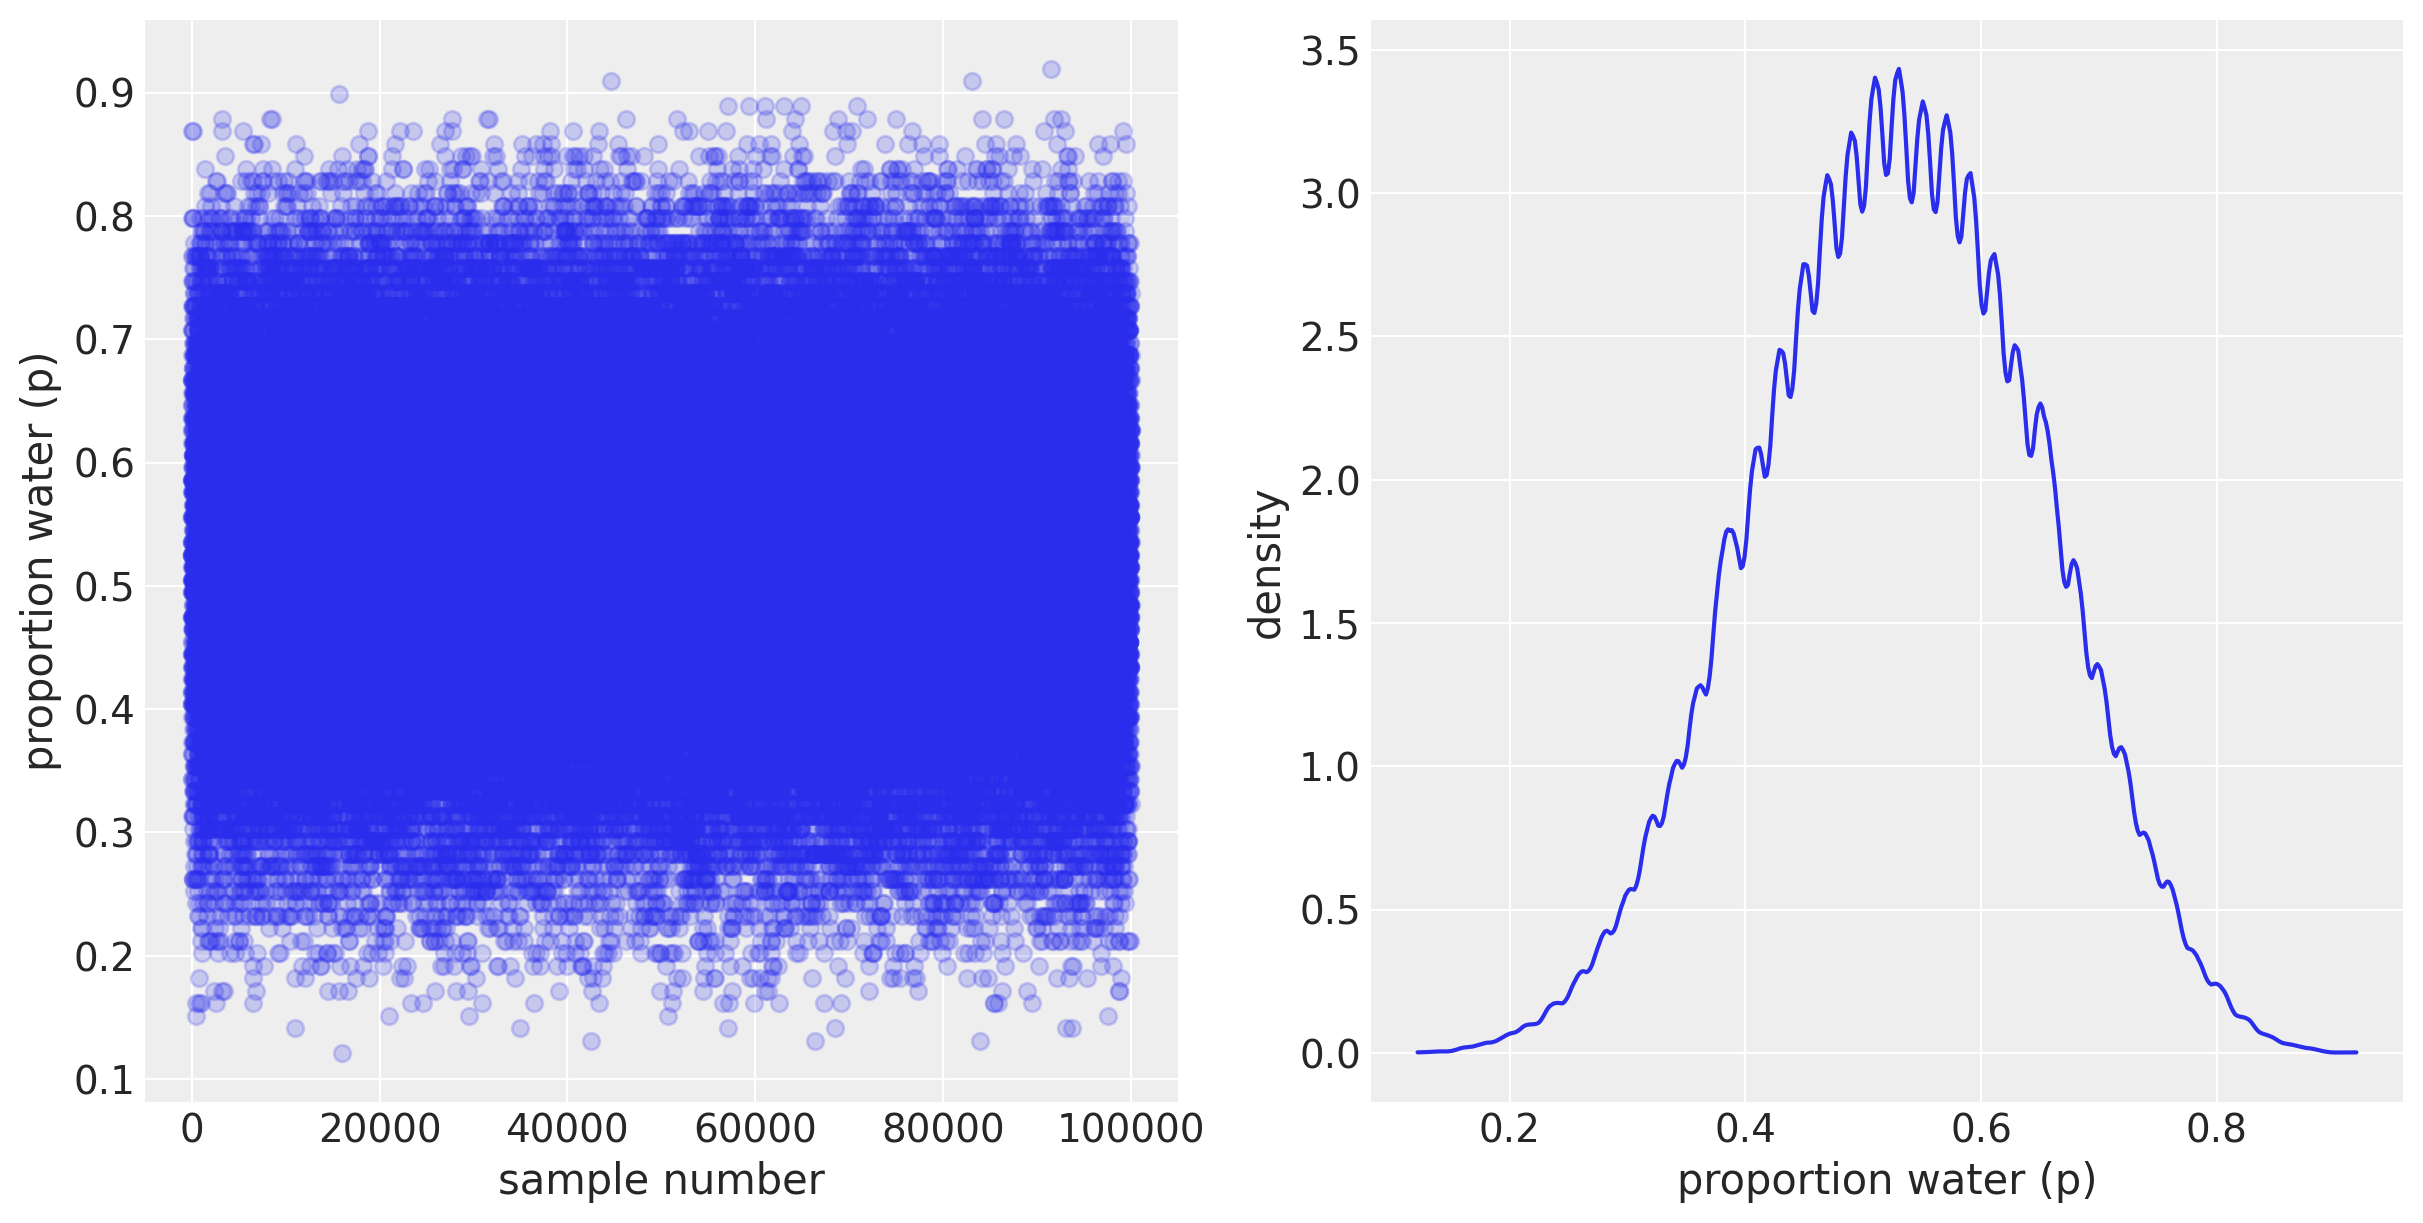

In [106]:
_, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))
ax0.plot(samples, "o", alpha=0.2)
ax0.set_xlabel("sample number")
ax0.set_ylabel("proportion water (p)")
az.plot_kde(samples, ax=ax1)
ax1.set_xlabel("proportion water (p)")
ax1.set_ylabel("density");

In [107]:
az.hdi(samples, 0.9)

array([0.34343434, 0.72727273])

#### 3M3

In [108]:
dummy_w = stats.binom.rvs(n=15, p=samples)

In [109]:
sum(dummy_w == 8) / len(dummy_w)

0.14565

#### 3M4

In [110]:
dummy_w = stats.binom.rvs(n=9, p=samples)

In [111]:
sum(dummy_w == 6) / len(dummy_w)

0.17632

#### 3M5

In [112]:
def posterior_grid_approx(grid_points=100, success=6, tosses=9):
    """
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
#     prior = np.repeat(5, grid_points)  # uniform
    prior = (p_grid >= 0.5).astype(int)  # truncated
    # prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

In [113]:
p_grid, posterior = posterior_grid_approx(grid_points=100, success=W, tosses=N)

In [114]:
samples = np.random.choice(p_grid, p=posterior, size=int(1e5), replace=True)

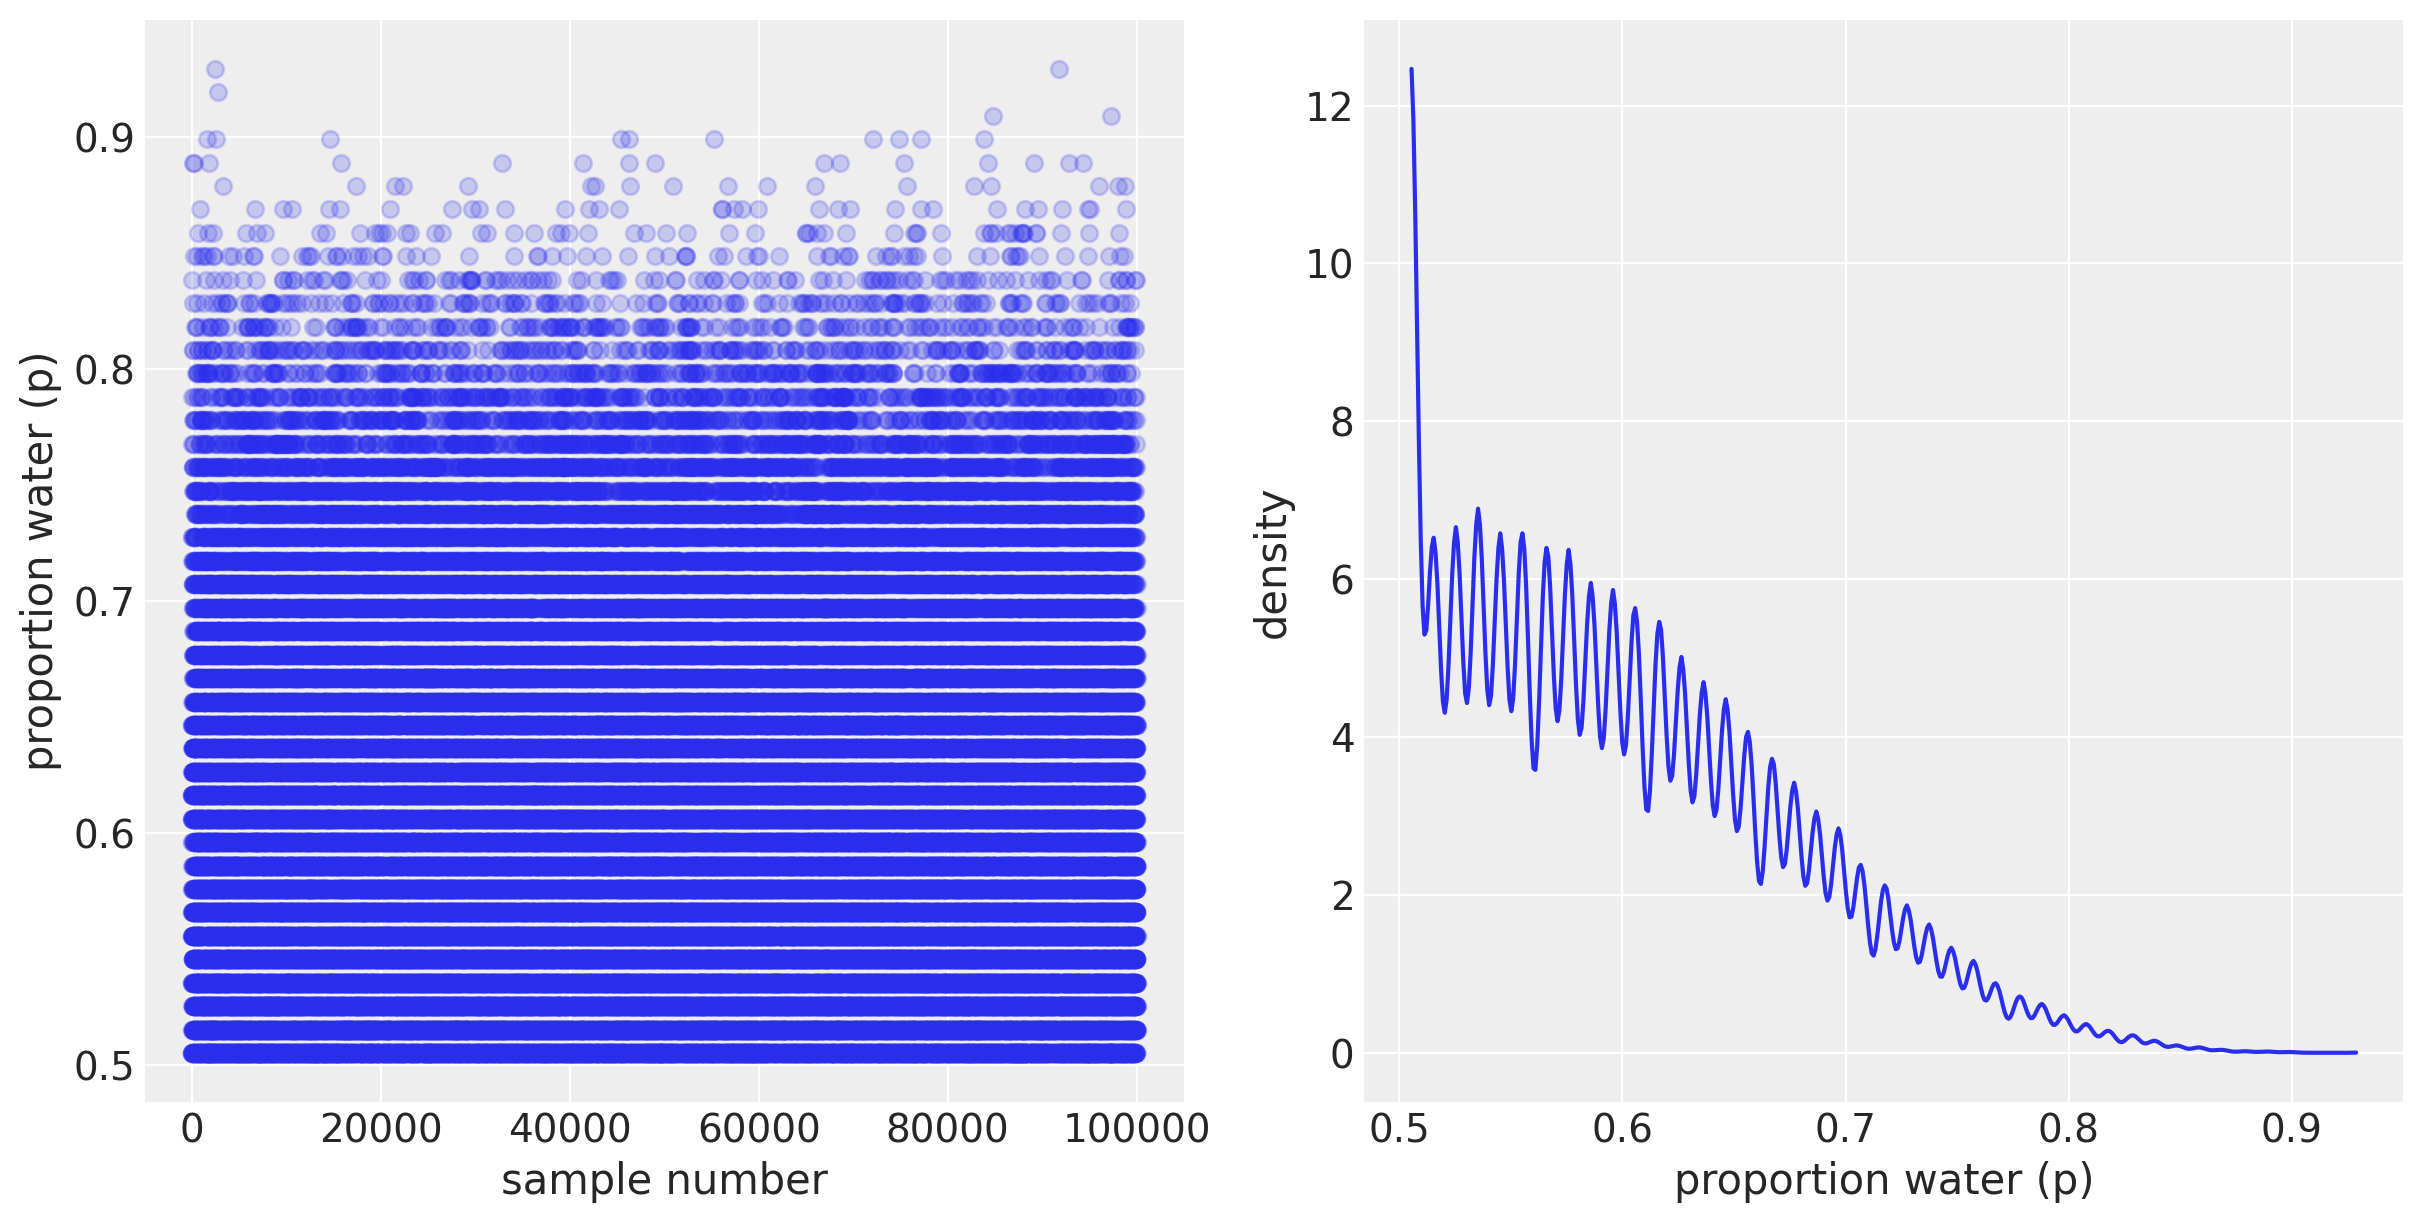

In [115]:
_, (ax0, ax1) = plt.subplots(1, 2, figsize=(12, 6))
ax0.plot(samples, "o", alpha=0.2)
ax0.set_xlabel("sample number")
ax0.set_ylabel("proportion water (p)")
az.plot_kde(samples, ax=ax1)
ax1.set_xlabel("proportion water (p)")
ax1.set_ylabel("density");

In [116]:
az.hdi(samples, 0.9)

array([0.50505051, 0.70707071])

In [117]:
dummy_w = stats.binom.rvs(n=15, p=samples)

In [118]:
sum(dummy_w == 8) / len(dummy_w)

0.15596

In [119]:
sum((samples > 0.6) * (samples < 0.8)) / len(samples)

0.45964

#### 3M6
Assuming flat prior there is no need to prepare the grid for it. Let's start with posterior right away.

In [120]:
def approx_size(tosses, grid_points=1000, probablity=0.7):
    """
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(5, grid_points)  # uniform

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(int(probablity * tosses), tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    
    samples = np.random.choice(p_grid, p=posterior, size=int(1e5), replace=True)  
    
    perc = np.percentile(samples, [0.5, 99.9])
    
    return perc[1] - perc[0]

In [123]:
approx_size(2600)

0.05005005005005003

In [124]:
stats.binom.pmf(2, 2, 0.7)

0.48999999999999994

#### Code 3.28

In [125]:
birth1 = np.array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
                   1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1])
birth2 = np.array([0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
                   1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
                   1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
                   0, 0, 0, 1, 1, 1, 0, 0, 0, 0])

#### Code 3.30

In [126]:
sum(birth1) + sum(birth2)

111

#### 3H1

In [184]:
def posterior_grid_approx(grid_points=1000, success=6, tosses=9):
    """
    """
    # define grid
    p_grid = np.linspace(0, 1, grid_points)

    # define prior
    prior = np.repeat(5, grid_points)  # uniform
#     prior = (p_grid >= 0.5).astype(int)  # truncated
    # prior = np.exp(- 5 * abs(p_grid - 0.5))  # double exp

    # compute likelihood at each point in the grid
    likelihood = stats.binom.pmf(success, tosses, p_grid)

    # compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    # standardize the posterior, so it sums to 1
    posterior = unstd_posterior / unstd_posterior.sum()
    return p_grid, posterior

In [185]:
p_grid, posterior = posterior_grid_approx(grid_points=1000, success=111, tosses=200)

In [186]:
p_grid[max(posterior) == posterior]

array([0.55455455])

#### 3H2

In [187]:
samples = np.random.choice(p_grid, 10000, True, posterior)

In [188]:
az.hdi(samples, 0.5)

array([0.53053053, 0.57657658])

In [189]:
az.hdi(samples, 0.89)

array([0.4964965 , 0.60760761])

In [190]:
az.hdi(samples, 0.97)

array([0.47947948, 0.62862863])

#### 3H3

In [191]:
samples

array([0.56256256, 0.58658659, 0.51551552, ..., 0.54654655, 0.62262262,
       0.5985986 ])

In [192]:
dummy_b = stats.binom.rvs(n=200, p=samples)

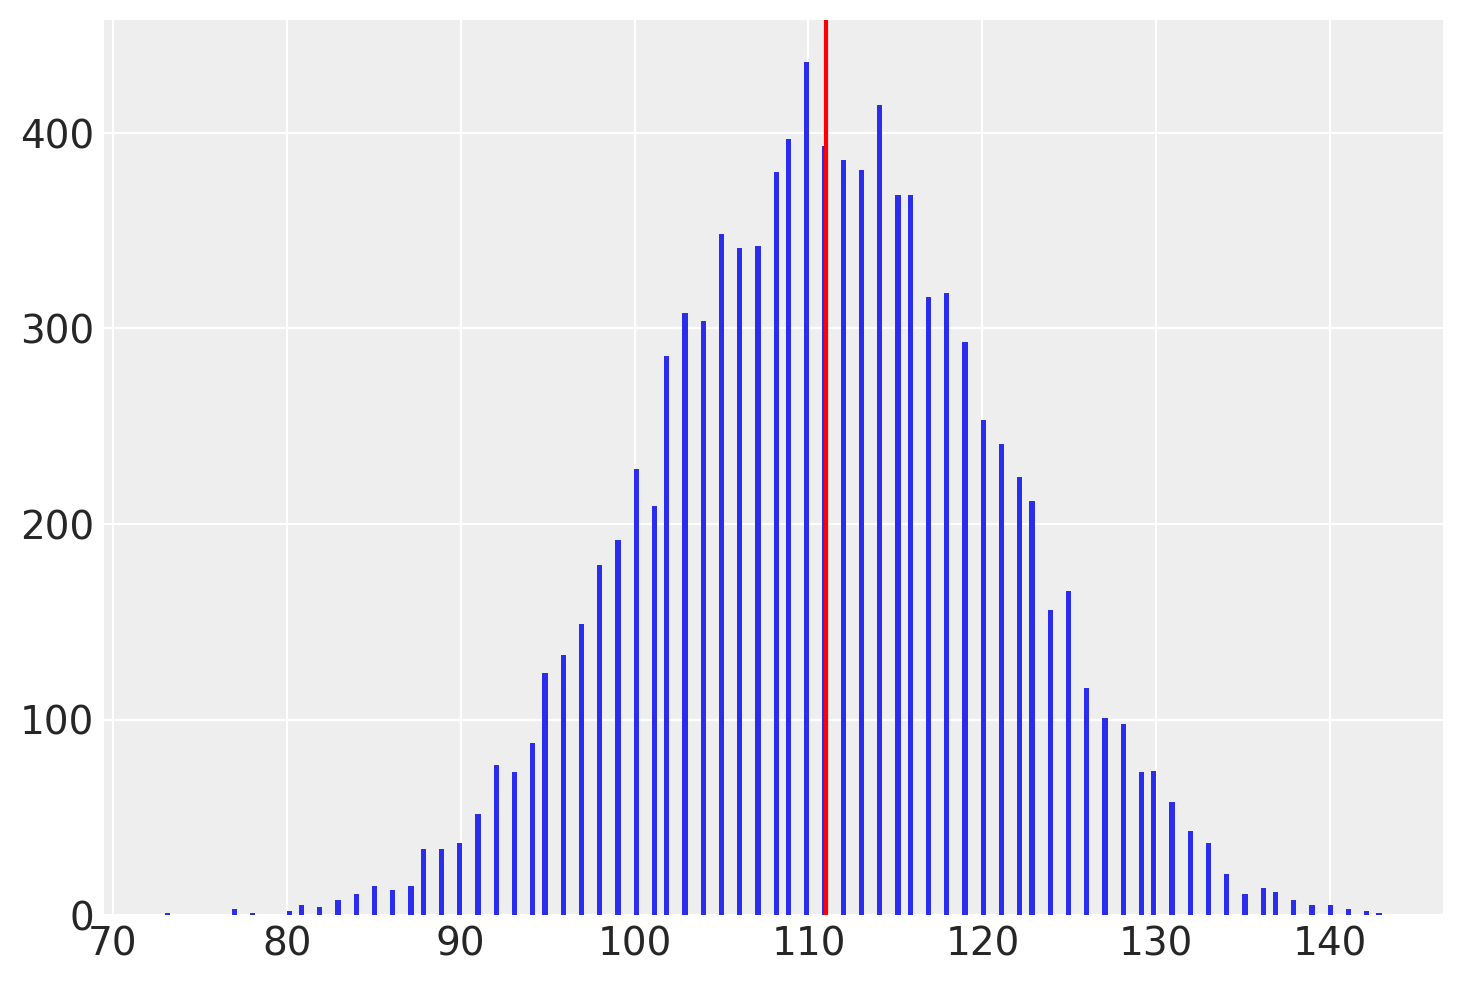

In [193]:
bar_width = 0.3
plt.hist(dummy_b, width=bar_width, bins=200)
plt.axvline(x=111, c='r');

#### 3H4

In [194]:
dummy_b = stats.binom.rvs(n=100, p=samples)

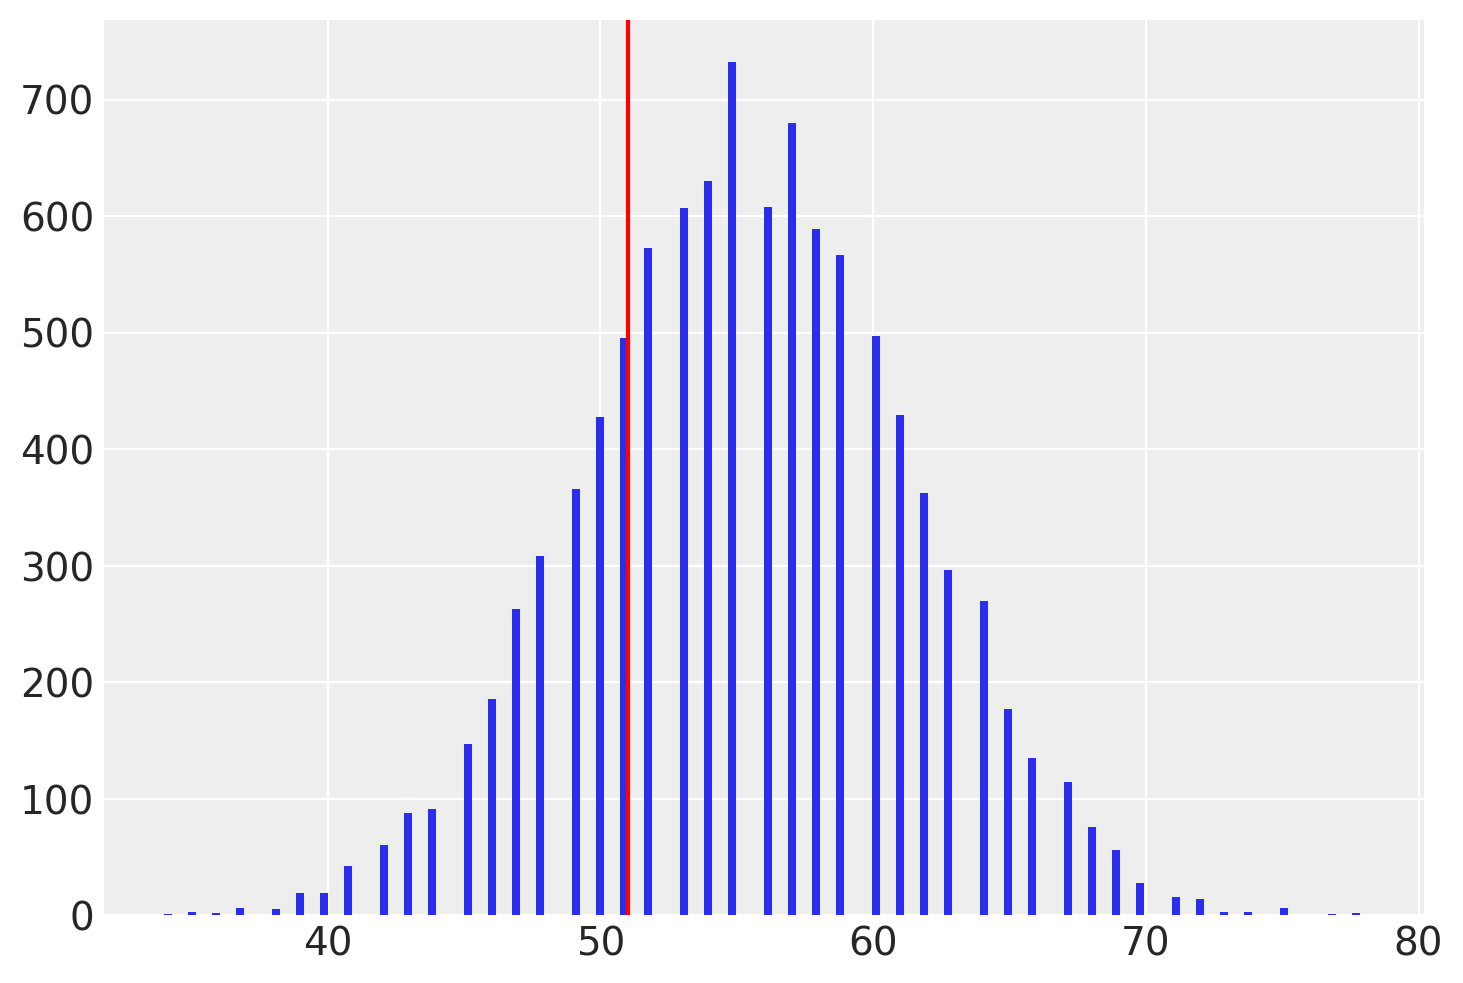

In [195]:
bar_width = 0.3
plt.hist(dummy_b, width=bar_width, bins=100)
plt.axvline(x=51, c='r');

#### 3H5

In [199]:
second_after_girl = birth2[birth1 == 0]

In [201]:
len(second_after_girl)

49

In [202]:
sum(second_after_girl) / len(second_after_girl)

0.7959183673469388

In [204]:
sum(second_after_girl)

39

In [203]:
dummy_b = stats.binom.rvs(n=49, p=samples)

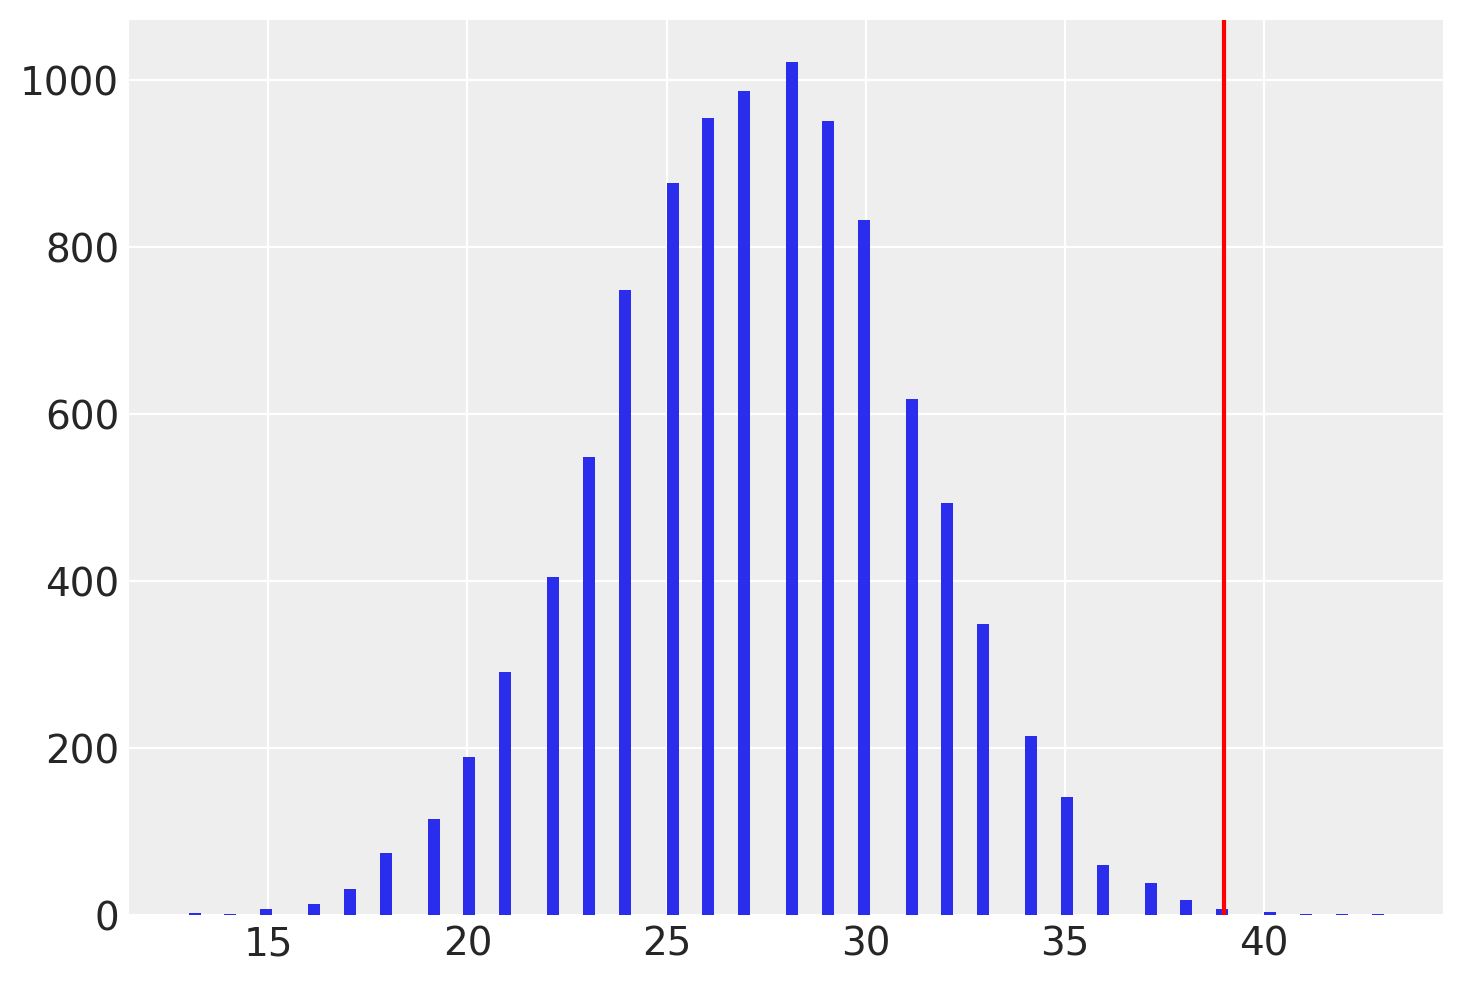

In [205]:
bar_width = 0.3
plt.hist(dummy_b, width=bar_width, bins=100)
plt.axvline(x=39, c='r');